# Microsoft Stock Prediction

In [44]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
file_name = os.listdir(path)[0]
train_path = os.path.join(path, file_name)

train_df = pd.read_csv(train_path)
print('Dataset loaded successfully.')

Dataset loaded successfully.


In [45]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


#### Feature Engineering

In [47]:
print(train_df.isnull().any())
print(train_df.isna().any())

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool
Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


In [48]:
train_df['Volume'] = train_df['Volume'].astype('float')
train_df.Volume

0       36865322.0
1       37487476.0
2       39223692.0
3       28809375.0
4       24753438.0
           ...    
1506    34061853.0
1507    25479853.0
1508    25227455.0
1509    24792012.0
1510    43623471.0
Name: Volume, Length: 1511, dtype: float64

**Adding time series features**

In [49]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


train_df['month'] = train_df['Date'].dt.month
train_df['year'] = train_df['Date'].dt.year
train_df['day'] = train_df['Date'].dt.day

train_df.head()


,Date,Open,High,Low,Close,Volume,month,year,day
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322.0,1.0,2015.0,4.0
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476.0,2.0,2015.0,4.0
2,2015-06-04 16:00:00,40.34,41.78,40.18,41.55,39223692.0,6.0,2015.0,4.0
3,2015-07-04 16:00:00,41.61,41.91,41.31,41.53,28809375.0,7.0,2015.0,4.0
4,2015-08-04 16:00:00,41.48,41.69,41.04,41.42,24753438.0,8.0,2015.0,4.0


            Date      Open      High       Low     Close    Volume     month  \
Date    1.000000  0.002544  0.002490  0.002203  0.002618 -0.075123  0.169485   
Open    0.002544  1.000000  0.999775  0.999757  0.999541  0.054072  0.008689   
High    0.002490  0.999775  1.000000  0.999622  0.999731  0.062573  0.008270   
Low     0.002203  0.999757  0.999622  1.000000  0.999767  0.044514  0.009018   
Close   0.002618  0.999541  0.999731  0.999767  1.000000  0.052153  0.007803   
Volume -0.075123  0.054072  0.062573  0.044514  0.052153  1.000000 -0.079168   
month   0.169485  0.008689  0.008270  0.009018  0.007803 -0.079168  1.000000   
year    0.987069  0.934641  0.934627  0.934890  0.934857  0.090029  0.009402   
day    -0.178691 -0.018481 -0.019479 -0.017734 -0.018794 -0.135866 -0.011197   

            year       day  
Date    0.987069 -0.178691  
Open    0.934641 -0.018481  
High    0.934627 -0.019479  
Low     0.934890 -0.017734  
Close   0.934857 -0.018794  
Volume  0.090029 -0.13586

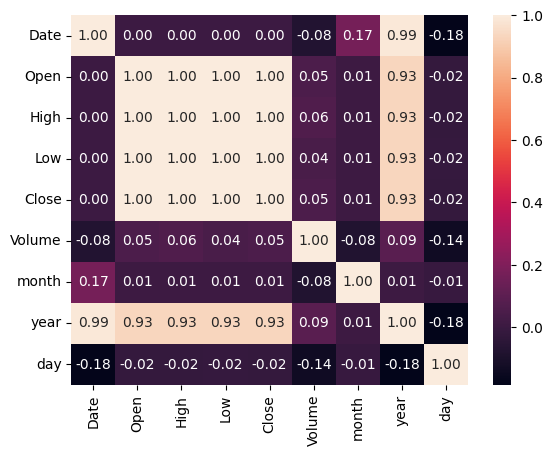

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

train_corr = train_df.corr()
print(train_corr)
sns.heatmap(train_corr, annot=True, fmt='.2f')
plt.show()

**Creating lag features**

In [51]:
def create_lag_feature(df: pd.DataFrame, column_name: str, n: int):
    for lag in range(1, n + 1):
        df[f'{column_name}_{lag}'] = df[column_name].shift(lag)
    return df

columns_to_lag = ['Open', 'High', 'Low', 'Volume']

def add_lag_features(df: pd.DataFrame, columns: list[str]):
    for column in columns:
        df = create_lag_feature(df, column, 5)
    return df

train_df = add_lag_features(df=train_df, columns=columns_to_lag)

train_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,597,2018-03-30 17:14:10.251256320,2015-01-04 16:00:00,2016-10-02 16:00:00,2018-04-06 16:00:00,2019-10-05 16:00:00,2021-12-03 16:00:00,NaN
Open,1511.0,107.385976,40.34,57.86,93.99,139.44,245.03,56.691333
High,1511.0,108.437472,40.74,58.06,95.1,140.325,246.13,57.382276
Low,1511.0,106.294533,39.72,57.42,92.92,137.825,242.92,55.977155
Close,1511.0,107.422091,40.29,57.855,93.86,138.965,244.99,56.702299
Volume,1511.0,30198625.081403,101612.0,21362129.0,26629615.0,34319615.5,135227059.0,14252659.08734
month,597.0,6.592965,1.0,4.0,7.0,10.0,12.0,3.449076
year,597.0,2017.762144,2015.0,2016.0,2018.0,2019.0,2021.0,1.769534
day,597.0,6.504188,1.0,3.0,6.0,10.0,12.0,3.453245
Open_1,1510.0,107.302848,40.34,57.855,93.87,139.4275,245.03,56.617918


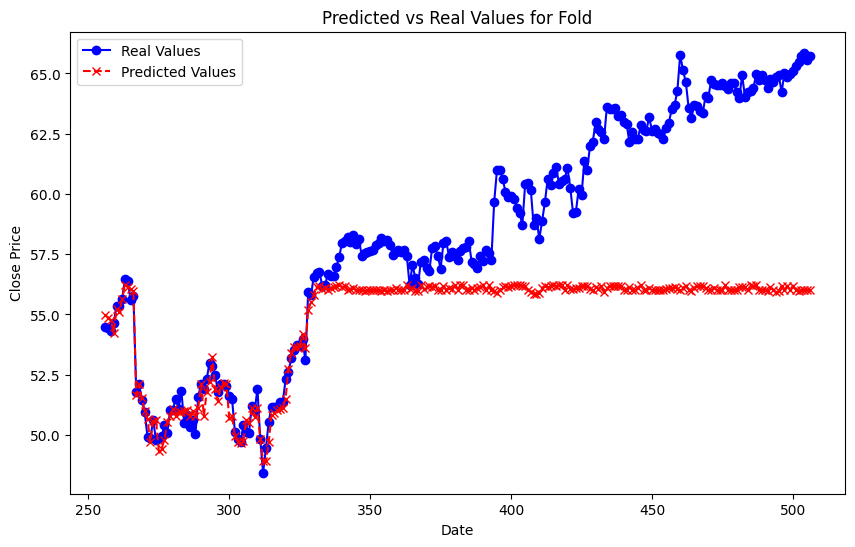

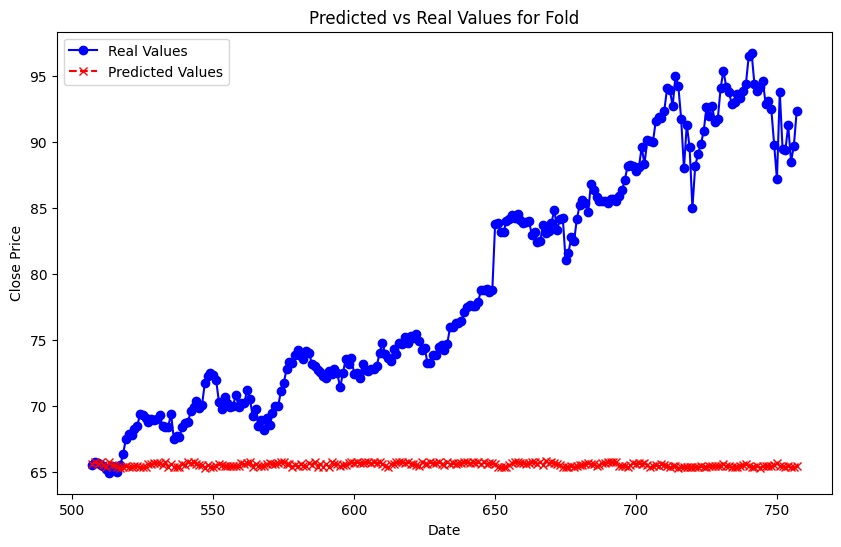

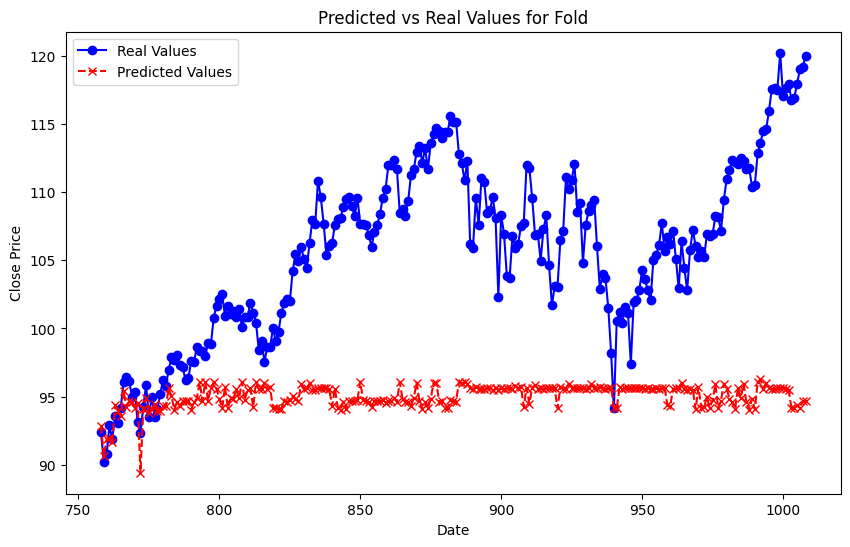

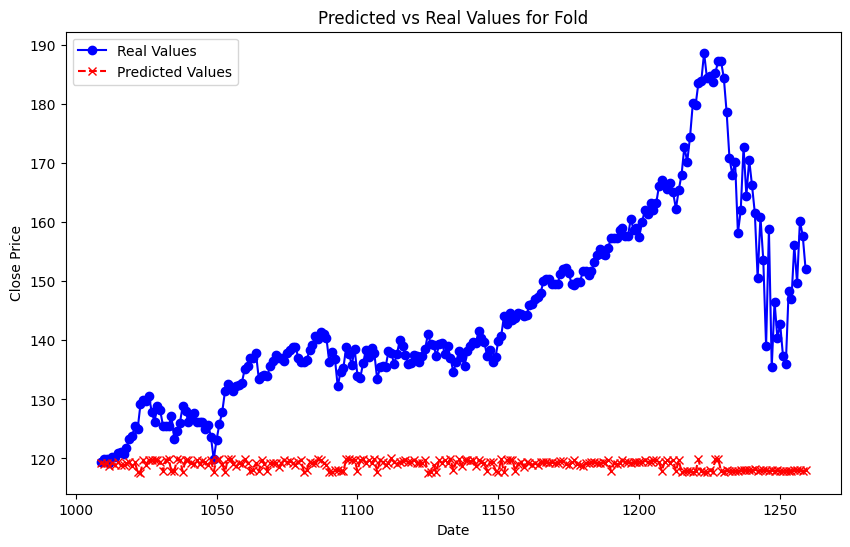

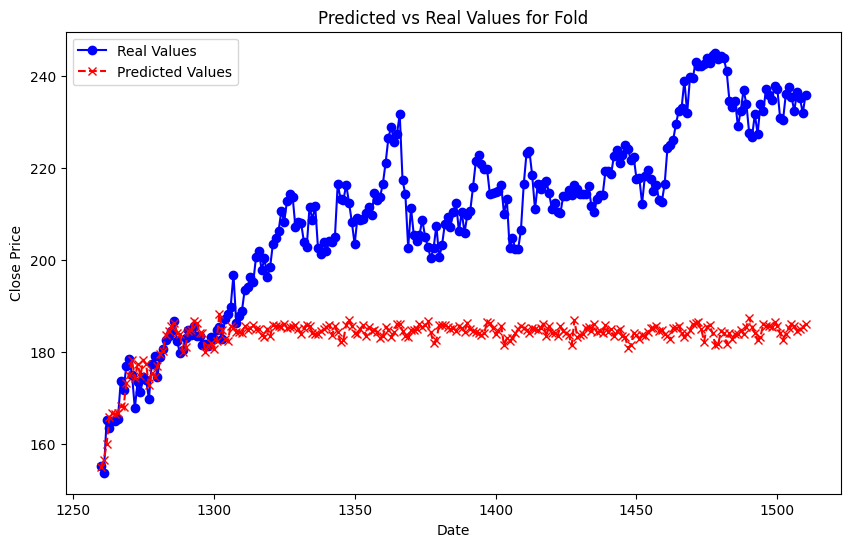

Average MSE over 5 folds: 465.3013631879683


In [57]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = train_df.drop(columns=['Close'])
y = train_df['Close']

datetime_columns = x.select_dtypes(include=['datetime']).columns
x = x.drop(columns=datetime_columns)
x_scaled = scaler.fit_transform(x)

tscv = TimeSeriesSplit(n_splits=5)

folds_mse = []

for train_index, val_index in tscv.split(x_scaled):
    X_train, X_val = x_scaled[train_index], x_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    folds_mse.append(mse)

    plt.figure(figsize=(10, 6))
    plt.plot(y_val.index, y_val, label='Real Values', color='blue', linestyle='-', marker='o')
    plt.plot(y_val.index, y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
    plt.title(f'Predicted vs Real Values for Fold')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

average_mse = sum(folds_mse) / len(folds_mse)
print(f'Average MSE over 5 folds: {average_mse}')
